# <span style='color:blue'> <center>Supervised Learning</center> </span>
## **Chapter 4.** Time Series Forecasting
#### by **Ivan Alducin**
<p><img src="https://pbs.twimg.com/media/ET3Jd7yXsAMvC2l.jpg" width="500"></p>

## Análisis Exploratorio
<p>Vamos a trabajar con el conjunto de datos de <code>Gapminder</code>. El objetivo será utilizar estos datos para predecir la esperanza de vida en un país determinado en función de características como el PIB, la tasa de fertilidad,la población del país, etc.

Dado que la variable objetivo aquí es cuantitativa, este es un problema de regresión. Por ahora usaremos una regresión lineal con una sola variable: <i>fertilidad</i>, que es el número promedio de hijos que da a luz una mujer en un país determinado. Para antes de proceder a crear nuestro primer modelo de regresion, tenemos que entender el contexto y que variables son las que afectan de manera directa al indice de esperanza de vida</p>

In [112]:
# # Importa las librerias principales de trabajo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importa el archivo de data a un DataFrame
df = pd.read_excel('data.xlsx')
df.head()

,PER_TAG,FECHA,YEAR,MONTH,MKT_NAME,MKT_LEVEL,PROD_TAG,ID_COUNTRY,PROD_NAME,MANUFACTURER,TYPE,SIZE,BRAND,TOTALES_FORMULA,TOTALES,SALES_EQ,SALES_VALUE,DATA_LEVEL,Unnamed: 18
0,M201801,2018-01-01,2018,enero,TOTAL CHILE + CANAL ESPECIFICO,TOTAL,P000000000002027596000000001000000046904,CHL,PILAS Y BATERIAS,NaN,NaN,NaN,NaN,PILAS Y BATERIAS,PILAS Y BATERIAS,4554670.0,2.508889e+06,TOTAL,NaN
1,M201801,2018-01-01,2018,enero,TOTAL CHILE + CANAL ESPECIFICO,TOTAL,P000000000002027596000000002000050837690,CHL,DURACELL ALKALINE,DURACELL,ALKALINE,NaN,DURACELL,DURACELL,DURACELL,1401410.0,7.020963e+02,TYPE,NaN
2,M201801,2018-01-01,2018,enero,TOTAL CHILE SUPER+AUTO+CONV STORE,MODERN TRADE,P000000000002027596000000001000000046904,CHL,PILAS Y BATERIAS,NaN,NaN,NaN,NaN,PILAS Y BATERIAS,PILAS Y BATERIAS,1078535.0,8.954393e+05,TOTAL,NaN
3,M201801,2018-01-01,2018,enero,TOTAL CHILE SUPER+AUTO+CONV STORE,MODERN TRADE,P000000000002027596000000002000050837690,CHL,DURACELL ALKALINE,DURACELL,ALKALINE,NaN,DURACELL,DURACELL,DURACELL,499960.0,5.404627e+00,TYPE,NaN
4,M201801,2018-01-01,2018,enero,TOTAL CHILE TRADICIONALES,TRADITIONAL,P000000000002027596000000001000000046904,CHL,PILAS Y BATERIAS,NaN,NaN,NaN,NaN,PILAS Y BATERIAS,PILAS Y BATERIAS,2729360.0,1.084634e+06,TOTAL,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PER_TAG          4724 non-null   object        
 1   FECHA            4724 non-null   datetime64[ns]
 2   YEAR             4724 non-null   int64         
 3   MONTH            4724 non-null   object        
 4   MKT_NAME         4724 non-null   object        
 5   MKT_LEVEL        4724 non-null   object        
 6   PROD_TAG         4697 non-null   object        
 7   ID_COUNTRY       4724 non-null   object        
 8   PROD_NAME        4724 non-null   object        
 9   MANUFACTURER     3207 non-null   object        
 10  TYPE             2586 non-null   object        
 11  SIZE             258 non-null    object        
 12  BRAND            2573 non-null   object        
 13  TOTALES_FORMULA  3110 non-null   object        
 14  TOTALES          3127 non-null   object 

In [80]:
duracell = df[(df['MKT_NAME'] == 'TOTAL MEXICO') & (df['TOTALES'] == 'PILAS Y BATERIAS')]
print(df.shape)
print(duracell.shape)

(4724, 20)
(62, 20)


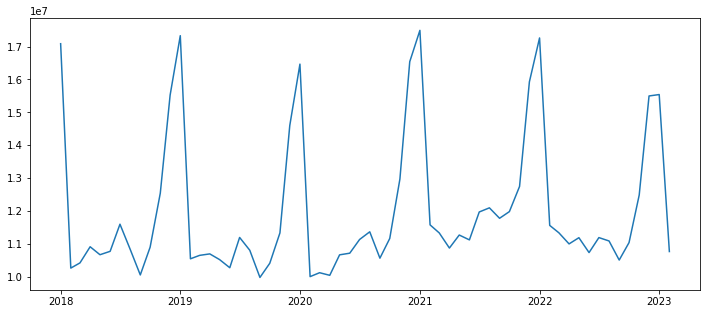

In [81]:
plt.plot(duracell['FECHA'], duracell['SALES_EQ'])

## Time Series Decomposition

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

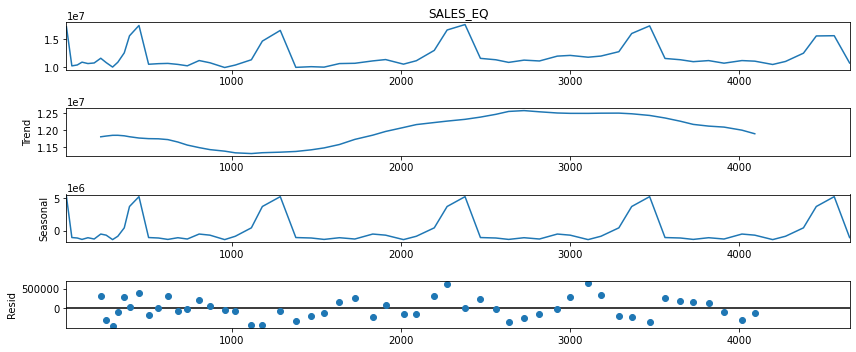

In [17]:
decomposition = seasonal_decompose(duracell['SALES_EQ'], period=12, model='additive')
plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show()

## Seasonal Component

C:\Users\IAlducin\AppData\Local\Temp\ipykernel_1176\4059196707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duracell['MONTH_NBR'] = duracell['FECHA'].dt.month


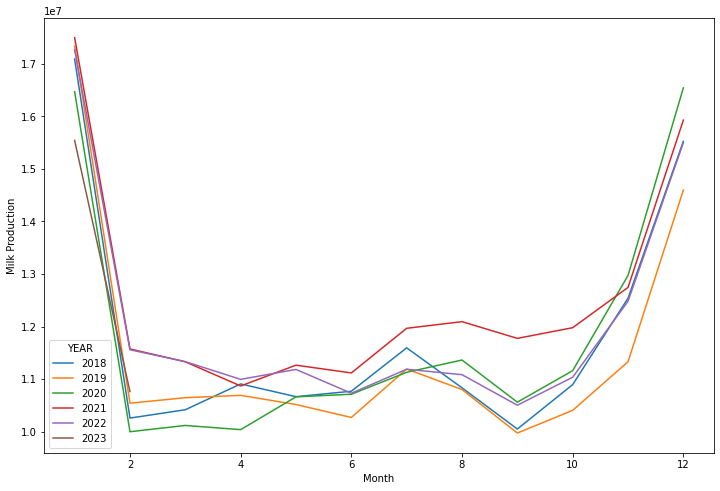

In [24]:
duracell['MONTH_NBR'] = duracell['FECHA'].dt.month
pivot = pd.pivot_table(duracell, values='SALES_EQ', index='MONTH_NBR', columns='YEAR', aggfunc='mean')
pivot.plot(figsize=(12,8))
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.show()

## ACF and PACF plots
ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


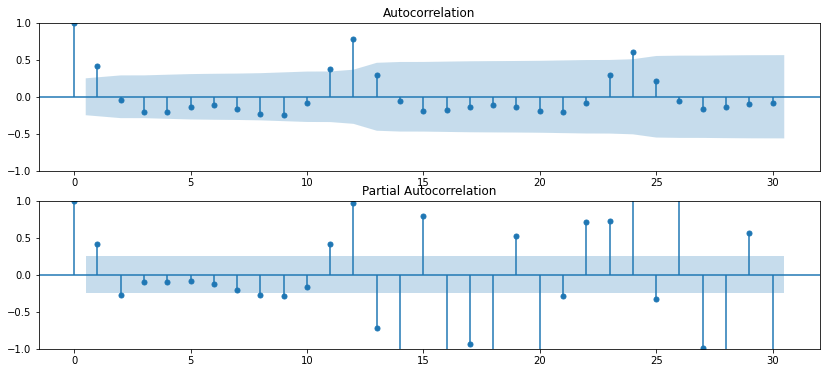

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(duracell['SALES_EQ'], lags=30, ax=ax1)
ax2 = plot_pacf(duracell['SALES_EQ'], lags=30, ax=ax2)
plt.show()

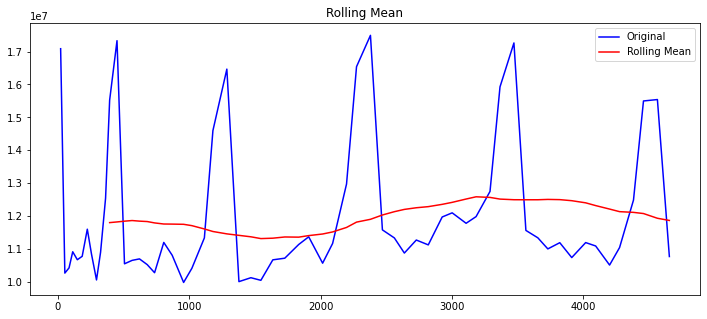

In [30]:
#Determing rolling statistics
rolmean = pd.Series(duracell['SALES_EQ']).rolling(window=12).mean()

#Plot rolling statistics:
orig = plt.plot(duracell['SALES_EQ'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

## Statistica Test
<p>Augmented Dickey Fuller Test If the p-value is lower than the threshold value (5% or 1%), we reject the null hypothesis and time series is stationary. If the p-value is higher than the threshold, we fail to reject the null hypothesis and time series is non-stationary.</p>. 

In [31]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(duracell['SALES_EQ'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.543588
p-value                         0.883226
#Lags Used                     11.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


## Making Time Series Stationary

In [36]:
df_diff = df[['FECHA','SALES_EQ']].diff().diff(12)
df_diff.dropna(inplace=True)

In [37]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['SALES_EQ'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -22.284582
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4678.000000
Critical Value (1%)              -3.431749
Critical Value (5%)              -2.862158
Critical Value (10%)             -2.567099
dtype: float64


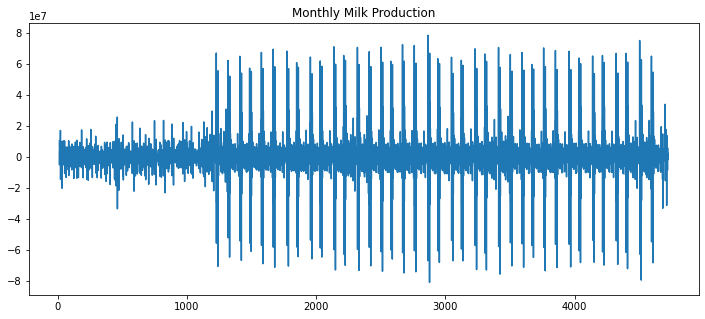

In [38]:
plt.plot(df_diff['SALES_EQ'])
plt.title('Monthly Milk Production')
plt.savefig('diffplot')
plt.show()
     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


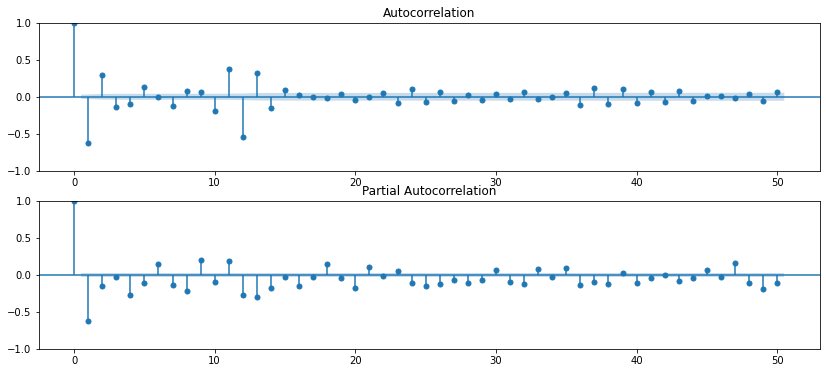

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff['SALES_EQ'], lags=50, ax=ax1)
ax2 = plot_pacf(df_diff['SALES_EQ'], lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

## Model Parameter Estimation

In [42]:
!pip install pmdarima

In [43]:
import pmdarima as pm
model = pm.auto_arima(duracell['SALES_EQ'], d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1422.422, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1425.860, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1426.030, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1423.857, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1423.897, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1424.371, Time=0.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1424.463, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1426.454, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1422.422, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12] intercept
Total fit time: 0.472 seconds


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -709.211
Date:                            Sat, 06 May 2023   AIC                           1422.422
Time:                                    12:33:46   BIC                           1426.206
Sample:                                         0   HQIC                          1423.857
                                             - 62                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -2.12e+04   6.78e+04     -0.313      0.754   -1.54e+05    1.12e+05
sigma2      2.184e+11   4.27e+10      5.115      0.000    1.35e+11    3.02e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.59   Prob(JB):                         0.73
Heteroskedasticity (H):               2.45   Skew:                            -0.26
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

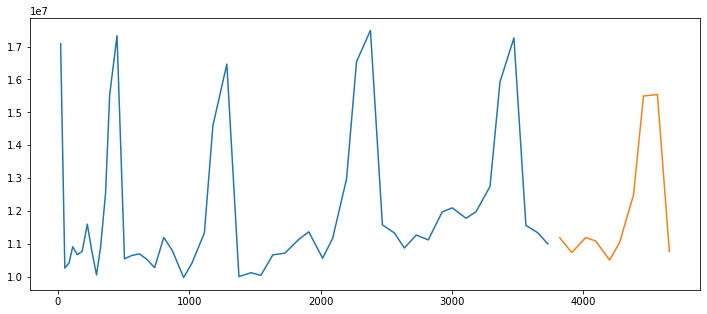

In [45]:
#divide into train and validation set
train = duracell[:int(0.85*(len(duracell)))]
test = duracell[int(0.85*(len(duracell))):]

#plotting the data
train['SALES_EQ'].plot()
test['SALES_EQ'].plot()

In [46]:
model = SARIMAX(train['SALES_EQ'],order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             SALES_EQ   No. Observations:                   52
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -560.990
Date:                              Sat, 06 May 2023   AIC                           1127.980
Time:                                      12:34:54   BIC                           1132.971
Sample:                                           0   HQIC                          1129.771
                                               - 52                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0027      0.175      0.015      0.988      -0.340       0.346
ma.S.L12      -0.0149      0.064     -0.234      0.815      -0.140       0.110
sigma2       1.89e+11    7.5e-14   2.52e+24      0.000    1.89e+11    1.89e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.76   Prob(JB):                         0.88
Heteroskedasticity (H):               1.65   Skew:                            -0.19
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+41. Standard errors may be unstable.
"""

## Statistical Model Checking

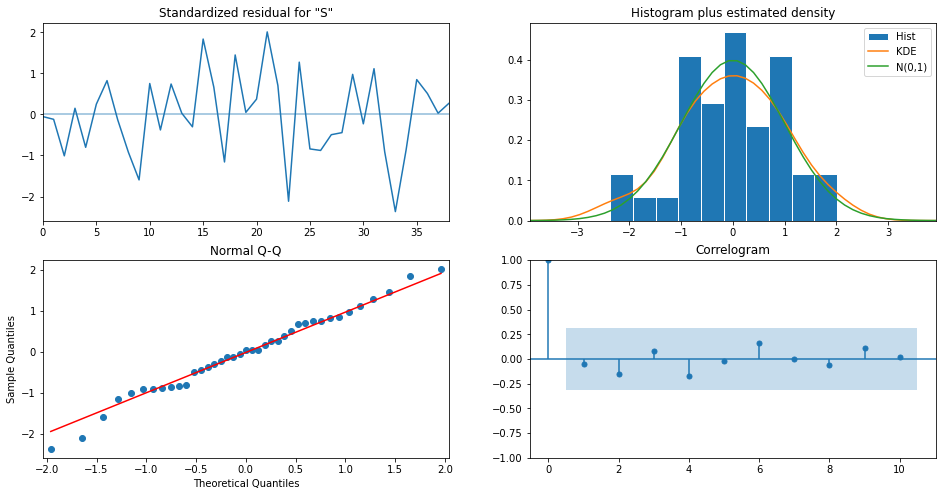

In [47]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Prediction

In [89]:
forecast_object = results.get_forecast(steps=len(test))

pred = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
dates

RangeIndex(start=52, stop=62, step=1)

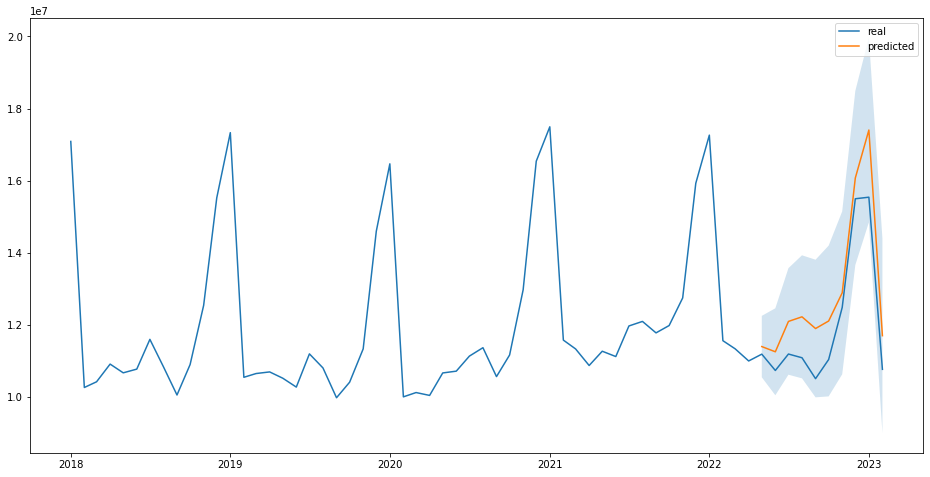

In [90]:
plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(duracell['FECHA'], duracell['SALES_EQ'], label='real')

# Plot the prediction means as line
plt.plot(test['FECHA'], pred, label='predicted')
plt.fill_between(test['FECHA'], conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [69]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(0,1,1,12) Predictions')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Model Performance

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
print('R2', r2_score(test['SALES_EQ'], predictions))
print('MAE', mean_absolute_error(test['SALES_EQ'], predictions))
print('MSE', mean_squared_error(test['SALES_EQ'], predictions))

R2 0.6908977301268191
MAE 900738.0448602522
MSE 1033921449266.7272


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


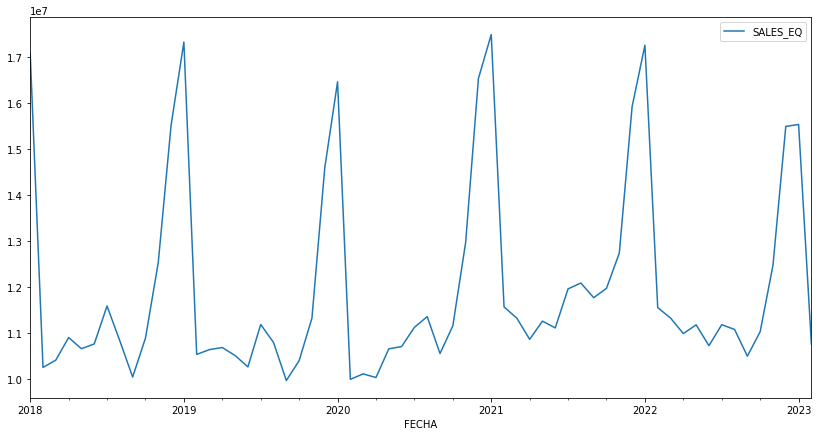

In [119]:
pred_f = results.get_forecast(steps=36)
pred_ci = pred_f.conf_int()

ax = test.plot(label='Sales', figsize=(14, 7))

plt.legend()
plt.show()

In [120]:
pred_f.predicted_mean

52    1.139589e+07
53    1.125114e+07
54    1.209360e+07
55    1.222118e+07
56    1.189618e+07
57    1.210533e+07
58    1.288657e+07
59    1.607392e+07
60    1.740401e+07
61    1.169761e+07
62    1.147199e+07
63    1.113295e+07
64    1.153235e+07
65    1.138760e+07
66    1.223006e+07
67    1.235764e+07
68    1.203264e+07
69    1.224179e+07
70    1.302303e+07
71    1.621038e+07
72    1.754047e+07
73    1.183407e+07
74    1.160845e+07
75    1.126941e+07
76    1.166880e+07
77    1.152405e+07
78    1.236652e+07
79    1.249409e+07
80    1.216910e+07
81    1.237825e+07
82    1.315949e+07
83    1.634684e+07
84    1.767693e+07
85    1.197052e+07
86    1.174491e+07
87    1.140587e+07
Name: predicted_mean, dtype: float64